# Random Forest Implementation

## Set Up

In [441]:
import pandas as pd
import matplotlib.pyplot as plt
# from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
import helpers as hp
import randomforest as rf

In [287]:
# recent https://forecast.weather.gov/product.php?site=MFL&issuedby=MIA&product=CLI&format=CI&version=2&glossary=0
# Old https://climatecenter.fsu.edu/climate-data-access-tools/downloadable-data


df = pd.read_csv("True values/miami_weather_complete.csv")
df['Datetime'] = pd.to_datetime(df['Datetime'])

In [288]:
df = df.drop(columns = {"Unnamed: 0", "precipitation",	"mean temp"})
df

,actual_max_temp,min temp,Datetime
0,81.0,63.0,2000-01-01
1,79.0,66.0,2000-01-02
2,80.0,64.0,2000-01-03
3,80.0,71.0,2000-01-04
4,80.0,67.0,2000-01-05
...,...,...,...
9089,72.0,55.0,2024-11-23
9090,78.0,58.0,2024-11-24
9091,82.0,64.0,2024-11-25
9092,84.0,67.0,2024-11-26


In [289]:
openmeteo = pd.read_csv('Open Meteo forecast/MiamiOpenMeteoData.csv')

In [290]:
openmeteo['time'] = pd.to_datetime(openmeteo['time'], format='%m/%d/%y')

# Convert the datetime column back to the desired string format 'DD/MM/YYYY'
openmeteo['time'] = openmeteo['time'].dt.strftime('%m-%d-%Y')

openmeteo = openmeteo.rename(columns = {"time": "Datetime"})
openmeteo['Datetime'] = pd.to_datetime(openmeteo['Datetime'])
openmeteo.dtypes

Datetime                           datetime64[ns]
weather_code (wmo code)                     int64
temperature_2m_max (°F)                   float64
temperature_2m_min (°F)                   float64
temperature_2m_mean (°F)                  float64
apparent_temperature_max (°F)             float64
apparent_temperature_min (°F)             float64
apparent_temperature_mean (°F)            float64
sunrise (iso8601)                          object
sunset (iso8601)                           object
daylight_duration (s)                     float64
sunshine_duration (s)                     float64
precipitation_sum (mm)                    float64
rain_sum (mm)                             float64
snowfall_sum (cm)                         float64
precipitation_hours (h)                     int64
wind_speed_10m_max (mp/h)                 float64
wind_gusts_10m_max (mp/h)                 float64
wind_direction_10m_dominant (°)           float64
shortwave_radiation_sum (MJ/m²)           float64


In [302]:
newdf = pd.merge(df,openmeteo, how = "inner", on = "Datetime")

In [303]:
newdf = newdf.drop(columns = {'sunrise (iso8601)','sunset (iso8601)', 'weather_code (wmo code)'})

In [304]:
newdf['precipitation_hours (h)'] = newdf['precipitation_hours (h)'].astype(float)
newdf = newdf.set_index("Datetime")

In [326]:
for col in newdf.columns:
            for lag in range(1,7):
                newdf[f'{col}_lag{lag}'] = newdf[col].shift(lag)
newdf = newdf.dropna()
new_lstm_df = newdf.copy()

/var/folders/mg/jjtr9hhj5zj6g0svf83l817h0000gn/T/ipykernel_16491/2430413464.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  newdf[f'{col}_lag{lag}'] = newdf[col].shift(lag)
/var/folders/mg/jjtr9hhj5zj6g0svf83l817h0000gn/T/ipykernel_16491/2430413464.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  newdf[f'{col}_lag{lag}'] = newdf[col].shift(lag)
/var/folders/mg/jjtr9hhj5zj6g0svf83l817h0000gn/T/ipykernel_16491/2430413464.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.

In [ ]:
# TODO Fix
def create_train_test(X, y, split_date):
    X_train = X[X.index < split_date]
    y_train = y[X.index < split_date]
    X_test = X[X.index >= split_date]
    y_test = y[X.index >= split_date]
    return X_train, y_train, X_test, y_test


## Create training sets

In [ ]:
# def find_best_random_forest_model(X_train, y_train):
#     model = RandomForestRegressor(random_state=42)

#     param_grid = {
#     'n_estimators': [200],  
#     'max_depth': [10, 20],     
#     'min_samples_split': [2, 5],          
#     'min_samples_leaf': [1, 2],           
#     'max_features': [None, 'sqrt', 'log2'],  
#     'bootstrap': [True]
#     }
#     grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=0)

#     grid_search.fit(X_train, y_train)

#     best_model = grid_search.best_estimator_

#     print("Best parameters found: ", grid_search.best_params_)
#     print("Best cross-validation score: ", grid_search.best_score_)
#     return best_model

# def get_rf_predictions(model, X_test):
#     predictions = model.predict(X_test)
#     return predictions

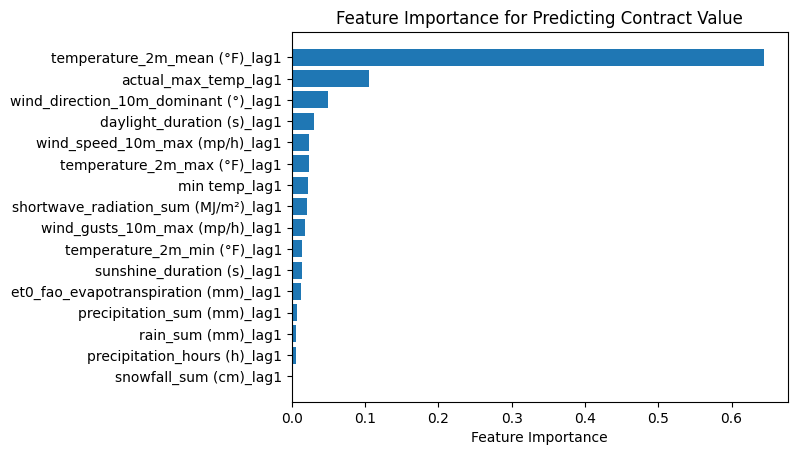

In [ ]:
feature_columns = [
        'actual_max_temp_lag1',
       'min temp_lag1', 'temperature_2m_max (°F)_lag1',
       'temperature_2m_min (°F)_lag1', 'temperature_2m_mean (°F)_lag1',
        'daylight_duration (s)_lag1',
       'sunshine_duration (s)_lag1', 'precipitation_sum (mm)_lag1',
       'rain_sum (mm)_lag1', 
       'precipitation_hours (h)_lag1', 'wind_speed_10m_max (mp/h)_lag1',
       'wind_gusts_10m_max (mp/h)_lag1',
       'wind_direction_10m_dominant (°)_lag1',
       'shortwave_radiation_sum (MJ/m²)_lag1',
       'et0_fao_evapotranspiration (mm)_lag1'
]

target = 'actual_max_temp'

actualcopy = newdf.copy()


X = actualcopy[feature_columns]
y = actualcopy[target]

model = RandomForestRegressor(n_estimators=100, random_state=42)

model.fit(X, y)

importances = model.feature_importances_

feature_importance_df = pd.DataFrame({
    'Feature': feature_columns,
    'Importance': importances
})

feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Feature Importance')
plt.title('Feature Importance for Predicting Contract Value')
plt.gca().invert_yaxis()  
plt.show()

## Testing the performance of the Random Forest model

In [ ]:
X_train, y_train, X_test, y_test = hp.create_train_test(X, y, .8)
all_predictions = pd.DataFrame(y_test)

In [ ]:
# grid search
best_model = rf.find_best_random_forest_model(X_train, y_train)

predictions = rf.get_rf_predictions(best_model, X_test)

# Calculate errors
hp.calculate_metrics(y_test, predictions, .8)

Best parameters found:  {'bootstrap': True, 'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
Best cross-validation score:  0.8124800141474677
Mean Squared Error (MSE): 6.891419718707022
Mean Absolute Error (MAE): 1.9421421030081798
Root Mean Squared Error (RMSE): 2.62515137062742


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout, Embedding, LSTM, Bidirectional

# def prepare_data(X_train, y_train, X_test, y_test, window_size=12):
#     feature_scaler = StandardScaler()
#     X_np_train = X_train.values
#     X_scaled_train = feature_scaler.fit_transform(X_np_train)
    
#     target_scaler = StandardScaler()
#     y_np_train = y_train.values
#     y_scaled_train = target_scaler.fit_transform(y_np_train.reshape(-1, 1))
    
#     X_windowed = []
#     y_windowed = []
#     for i in range(len(X_scaled_train) - window_size + 1):
#         X_window = X_scaled_train[i:i+window_size]
#         y_window = y_scaled_train[i+window_size-1]
#         X_windowed.append(X_window)
#         y_windowed.append(y_window)
    
#     X_windowed = np.array(X_windowed)
#     y_windowed = np.array(y_windowed)
    
#     X_np_test = X_test.values
#     X_scaled_test = feature_scaler.transform(X_np_test)
#     y_np_test = y_test.values
#     y_scaled_test = target_scaler.transform(y_np_test.reshape(-1, 1))

#     X_test_windowed = []
#     y_test_windowed = []
#     for i in range(len(X_scaled_test) - window_size + 1):
#         X_window = X_scaled_test[i:i+window_size]
#         y_window = y_scaled_test[i+window_size-1] #drops first two observations
#         X_test_windowed.append(X_window)
#         y_test_windowed.append(y_window)
    
#     X_test_windowed = np.array(X_test_windowed)
#     y_test_windowed = np.array(y_test_windowed)
    
#     return X_windowed, y_windowed, X_test_windowed, y_test_windowed, feature_scaler, target_scaler

def Train_LSTM(X_trainn,y_trainn,units,batch_size,epochs, verbose=2, learning_rate=0.001):
    #==Define model architecture
    model = Sequential()
    #===== Add LSTM layers
    model.add(LSTM(units = units, return_sequences=True,activation='relu',
                   input_shape=(X_trainn.shape[1], X_trainn.shape[2])))
    #===== Hidden layer
    model.add(LSTM(units = units))
    #=== output layer
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(1))
    #==== Compiling the model
    model.compile(optimizer='adam', loss='mean_squared_error') 
    #====== Fit Model
    early_stop = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss',patience = 10)
    history = model.fit(X_trainn, y_trainn, epochs = epochs, validation_split = 0.2,
                        batch_size = batch_size, shuffle = False, callbacks = [early_stop],verbose=0)
    
    modelN='LSTM'
    return(history,modelN,model)


def Train_BiLSTM(X_train,y_train,units,batch_size,epochs, verbose=2, learning_rate=0.001):
    model = Sequential()
    model.add(Bidirectional(LSTM(30, return_sequences=True, activation='tanh', 
                                  input_shape=(X_train.shape[1], X_train.shape[2]))))
    model.add(Bidirectional(LSTM(20, return_sequences=True, activation='tanh')))
    model.add(Bidirectional(LSTM(10, return_sequences=False, activation='tanh')))
    
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(32, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(1))

    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['accuracy'])

    # model.compile(optimizer='adam', loss='mape',  metrics=['MeanSquaredError', 'MeanAbsoluteError','RootMeanSquaredError'],) 
    #====== Fit Model
    early_stop = tf.keras.callbacks.EarlyStopping(
        monitor='val_loss', 
        patience=10, 
        restore_best_weights=True
    )
    history = model.fit(X_train, y_train, epochs = epochs, validation_split = 0.2,
                        batch_size = batch_size,  shuffle = False, callbacks = [early_stop],verbose=verbose)
    
    modelN='BiLSTM'
    return(history,modelN,model)

y_lstm = new_lstm_df['actual_max_temp']

X_lstm = new_lstm_df[['temperature_2m_mean (°F)_lag1',
 'apparent_temperature_mean (°F)_lag1',
 'apparent_temperature_min (°F)_lag1',
 'apparent_temperature_max (°F)_lag1',
 'actual_max_temp_lag1',
 'wind_direction_10m_dominant (°)_lag1',
 'temperature_2m_max (°F)_lag1']]
 
X_lstm_train, y_lstm_train, X_lstm_test,  y_lstm_test = create_train_test(X_lstm, y_lstm, '2022-01-01')
X_windowed, y_windowed, X_test_windowed, y_test_windowed, feature_scaler, target_scaler = prepare_data(X_lstm_train, y_lstm_train, X_lstm_test,  y_lstm_test, window_size=3)

# print(X_windowed.shape, y_windowed.shape, X_test_windowed.shape, y_test_windowed.shape)
lstm_units = 64  
lstm_batch_size = 64
lstm_epochs = 50
lstm_history, LSTM_model_name, trained_lstm_model = Train_LSTM(X_windowed, y_windowed, lstm_units, lstm_batch_size, lstm_epochs, verbose=2, learning_rate = .0007)

bl_units = 64  
bl_batch_size = 64
bl_epochs = 50
bilstm_history, biLSTM_model_name, trained_bilstm_model = Train_BiLSTM(X_windowed, y_windowed, bl_units, bl_batch_size, bl_epochs, verbose=2, learning_rate = .0005)

# Model summary to check the architecture
trained_bilstm_model.summary()



# Plot loss curves
plt.plot(lstm_history.history['loss'], label='Training Loss')
plt.plot(lstm_history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title(f'{LSTM_model_name} - Loss Curve')
plt.show()
print('Number of elements in y_train_scaled:', len(y_train_scaled))



plt.plot(bilstm_history.history['loss'], label='Training Loss')
plt.plot(bilstm_history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title(f'{biLSTM_model_name} - Loss Curve')
plt.show()
print('Number of elements in y_train_scaled:', len(y_train_scaled))



2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277
27

34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


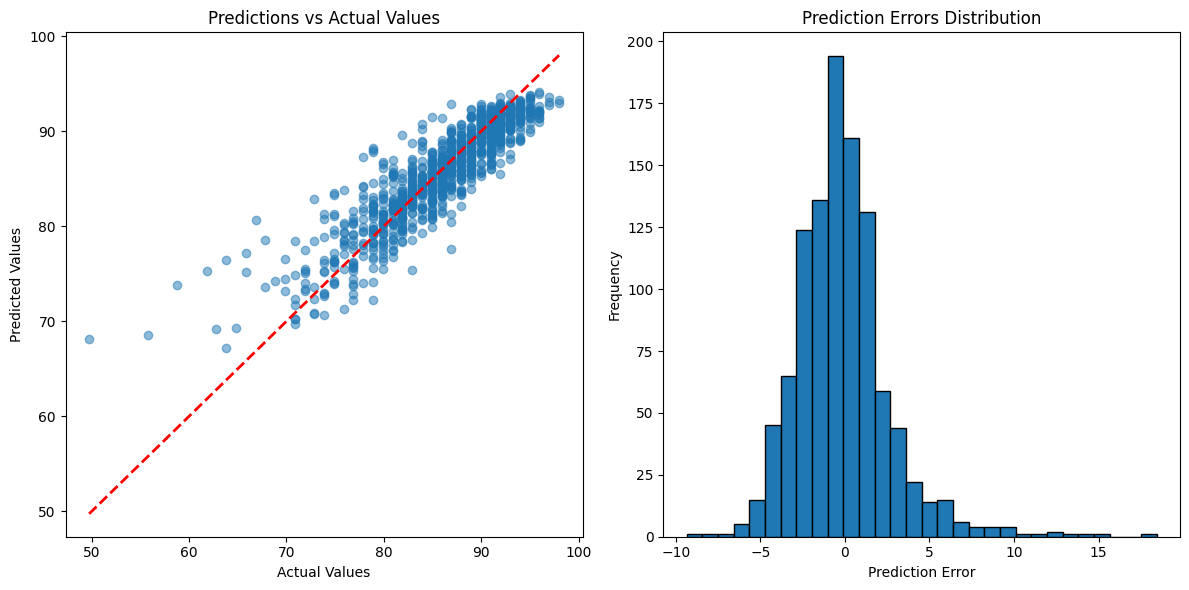

Prediction Error Metrics:
Mean Absolute Error: 2.0079
Mean Squared Error: 7.7675
Root Mean Squared Error: 2.7870


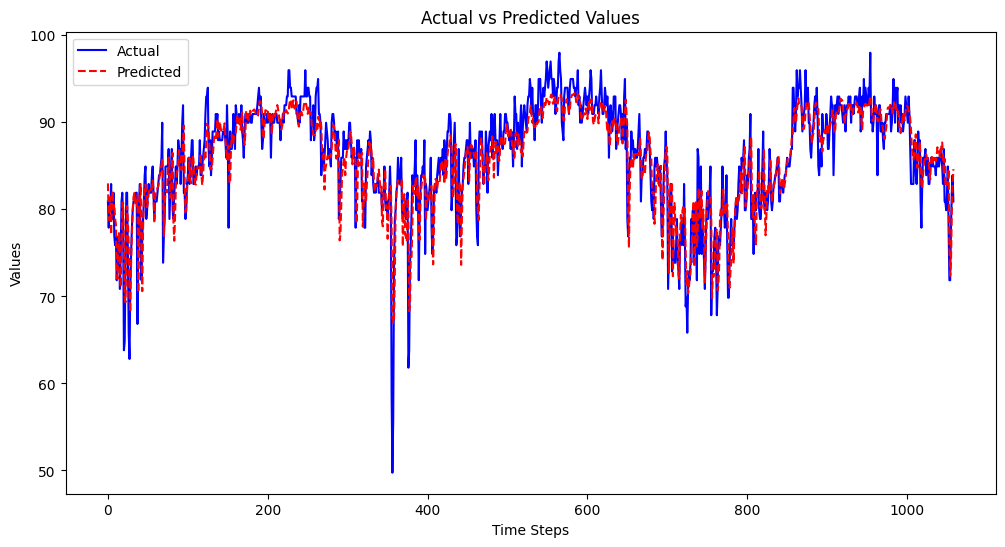

In [ ]:
bilstm_y_pred = trained_bilstm_model.predict(X_test_windowed)

# Inverse transform predictions and actual values
bilstm_y_pred_original = y_scaler.inverse_transform(bilstm_y_pred)
bilstm_y_test_original = y_scaler.inverse_transform(y_test_windowed)

# Plot predictions vs actual
plt.figure(figsize=(12, 6))

# Scatter plot of predictions vs actual
plt.subplot(1, 2, 1)
plt.scatter(bilstm_y_test_original, bilstm_y_pred_original, alpha=0.5)
plt.plot([bilstm_y_test_original.min(), bilstm_y_test_original.max()], 
         [bilstm_y_test_original.min(), bilstm_y_test_original.max()], 
         'r--', lw=2)
plt.title('Predictions vs Actual Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

# # Prediction errors histogram
errors = bilstm_y_pred_original - bilstm_y_test_original
plt.subplot(1, 2, 2)
plt.hist(errors, bins=30, edgecolor='black')
plt.title('Prediction Errors Distribution')
plt.xlabel('Prediction Error')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Calculate error metrics
mae = np.mean(np.abs(errors))
mse = np.mean(errors**2)
rmse = np.sqrt(mse)

print("Prediction Error Metrics:")
print(f"Mean Absolute Error: {mae:.4f}")
print(f"Mean Squared Error: {mse:.4f}")
print(f"Root Mean Squared Error: {rmse:.4f}")


# y_test_original = pd.Series(y_test_original, index=y_lstm_test.index) 
# y_pred_original = pd.Series(y_pred_original, index=y_lstm_test.index) 
plt.figure(figsize=(12, 6))
plt.plot( y_test_original, label='Actual', color='blue')
plt.plot(y_pred_original, label='Predicted', color='red', linestyle='--')
plt.title('Actual vs Predicted Values')
plt.xlabel('Time Steps')
plt.ylabel('Values')
plt.legend()
plt.show()

# 1061

34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


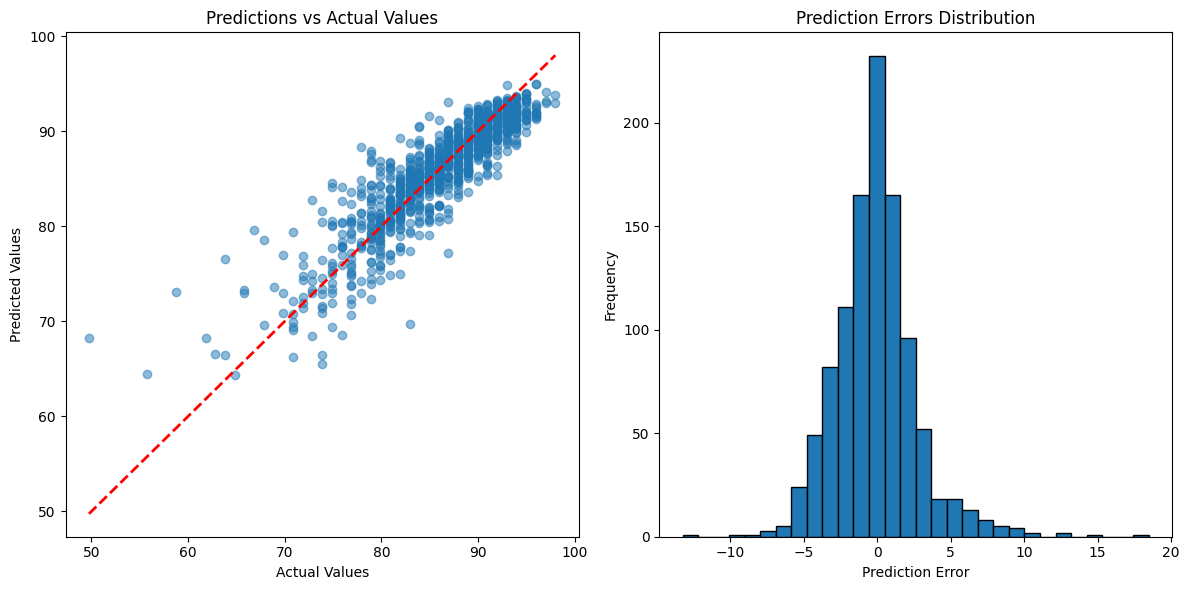

Prediction Error Metrics:
Mean Absolute Error: 2.0133
Mean Squared Error: 7.9634
Root Mean Squared Error: 2.8220


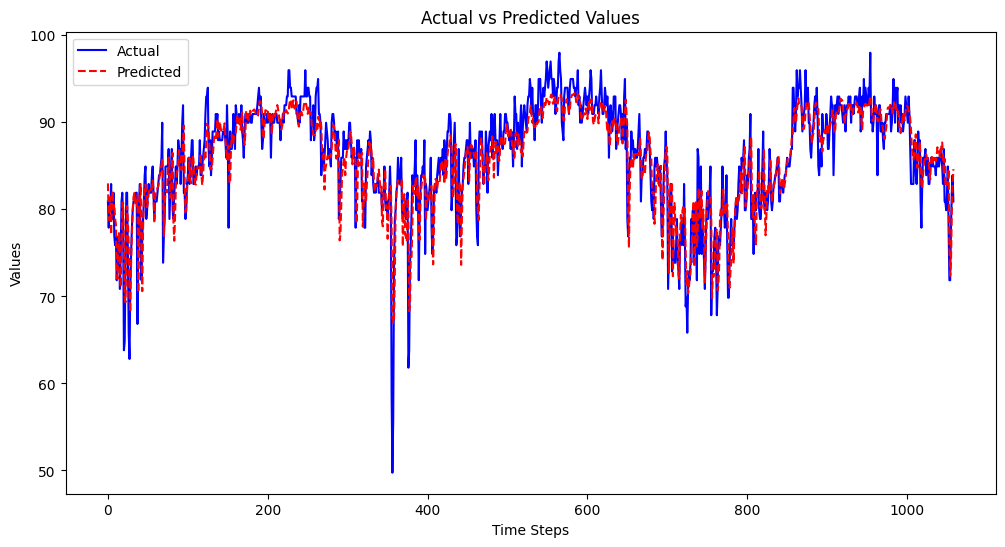

In [359]:
lstm_y_pred = trained_lstm_model.predict(X_test_windowed)

# # Inverse transform predictions and actual values
lstm_y_pred_original = y_scaler.inverse_transform(lstm_y_pred)
lstm_y_test_original = y_scaler.inverse_transform(y_test_windowed)

# Plot predictions vs actual
plt.figure(figsize=(12, 6))

# # Scatter plot of predictions vs actual
plt.subplot(1, 2, 1)
plt.scatter(lstm_y_test_original, lstm_y_pred_original, alpha=0.5)
plt.plot([lstm_y_test_original.min(), lstm_y_test_original.max()], 
         [lstm_y_test_original.min(), lstm_y_test_original.max()], 
         'r--', lw=2)
plt.title('Predictions vs Actual Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

# # Prediction errors histogram
errors = lstm_y_pred_original - lstm_y_test_original
plt.subplot(1, 2, 2)
plt.hist(errors, bins=30, edgecolor='black')
plt.title('Prediction Errors Distribution')
plt.xlabel('Prediction Error')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Calculate error metrics
mae = np.mean(np.abs(errors))
mse = np.mean(errors**2)
rmse = np.sqrt(mse)

print("Prediction Error Metrics:")
print(f"Mean Absolute Error: {mae:.4f}")
print(f"Mean Squared Error: {mse:.4f}")
print(f"Root Mean Squared Error: {rmse:.4f}")


# y_test_original = pd.Series(y_test_original, index=y_lstm_test.index) 
# y_pred_original = pd.Series(y_pred_original, index=y_lstm_test.index) 
plt.figure(figsize=(12, 6))
plt.plot( y_test_original, label='Actual', color='blue')
plt.plot(y_pred_original, label='Predicted', color='red', linestyle='--')
plt.title('Actual vs Predicted Values')
plt.xlabel('Time Steps')
plt.ylabel('Values')
plt.legend()
plt.show()

# 1061

In [ ]:
y_actual_test = y_lstm_test.iloc[2:]
rf_predictions = predictions[2:]
predictions_df = pd.DataFrame(y_actual_test)
predictions_df['lstm_predictions'] = lstm_y_pred_original
predictions_df['bilstm_predictions'] = bilstm_y_pred_original
predictions_df['rf_predictions'] = rf_predictions

open_meteo_forecast = pd.read_csv("/Users/bram/Desktop/AI-class/semester-project-bram-long/open-meteo-25.79N80.28W2m.csv")
open_meteo_forecast ['time'] = pd.to_datetime(open_meteo_forecast ['time'], format='%m/%d/%y')
open_meteo_forecast = open_meteo_forecast.set_index("time")


prediction_merge = pd.merge(open_meteo_forecast, predictions_df, left_index=True, right_index=True)
prediction_merge





ValueError: Length of values (210) does not match length of index (104)

In [426]:

actual = prediction_merge['actual_max_temp']
predicted = prediction_merge['open_meteo_forecast']

# Calculate MSE (Mean Squared Error)
mse = mean_squared_error(actual, predicted)

# Calculate RMSE (Root Mean Squared Error)
rmse = np.sqrt(mse)

# Calculate MAE (Mean Absolute Error)
mae = mean_absolute_error(actual, predicted)

# Print the results
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")

MSE: 4.502521246458923
RMSE: 2.121914523834295
MAE: 1.7540132200188858


In [418]:
prediction_merge.isna().sum()

open_meteo_forecast    0
actual_max_temp        0
lstm_predictions       0
bilstm_predictions     0
rf_predictions         0
dtype: int64

2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
11/11 - 7s - 610ms/step - accuracy: 0.0000e+00 - loss: 0.9164 - val_accuracy: 0.0000e+00 - val_loss: 1.1850
Epoch 2/50
11/11 - 0s - 13ms/step - accuracy: 0.0000e+00 - loss: 0.8690 - val_accuracy: 0.0000e+00 - val_loss: 1.1021
Epoch 3/50
11/11 - 0s - 12ms/step - accuracy: 0.0000e+00 - loss: 0.7952 - val_accuracy: 0.0000e+00 - val_loss: 0.9719
Epoch 4/50
11/11 - 0s - 13ms/step - accuracy: 0.0000e+00 - loss: 0.7009 - val_accuracy: 0.0000e+00 - val_loss: 0.7913
Epoch 5/50
11/11 - 0s - 14ms/step - accuracy: 0.0000e+00 - loss: 0.5603 - val_accuracy: 0.0000e+00 - val_loss: 0.5870
Epoch 6/50
11/11 - 0s - 10ms/step - accuracy: 0.0000e+00 - loss: 0.4365 - val_accuracy: 0.0000e+00 - val_loss: 0.4159
Epoch 7/50
11/11 - 0s - 8ms/step - accuracy: 0.0000e+00 - loss: 0.3075 - val_accuracy: 0.0000e+00 - val_loss: 0.3452
Epoch 8/50
11/11 - 0s - 9ms/step - accuracy: 0.0000e+00 - loss: 0.2916 - val_accuracy: 0.0000e+00 - val_loss: 0.3056
Epoch 9/50
11/11 - 0s - 12ms/step - accuracy: 0.0000e+00 

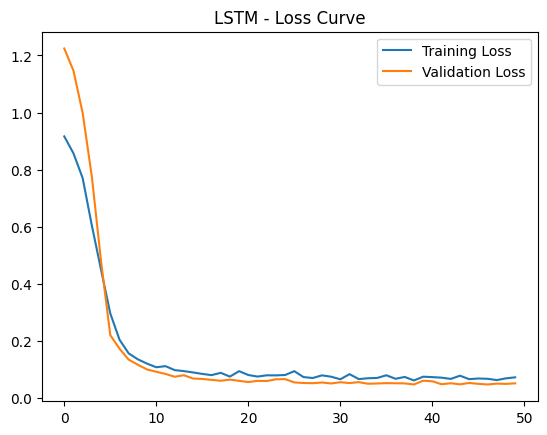

Number of elements in y_train_scaled: 50890


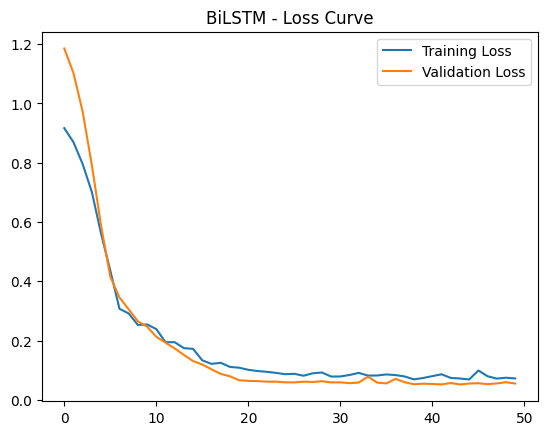

Number of elements in y_train_scaled: 50890


In [ ]:
from sklearn.model_selection import train_test_split

y_new_lstm = prediction_merge['actual_max_temp']

X_new_lstm = prediction_merge[['open_meteo_forecast', 'lstm_predictions',
       'bilstm_predictions', 'rf_predictions']]
 
X_lstm_train, X_temp, y_lstm_train, y_temp = train_test_split(
    X_new_lstm, y_new_lstm, test_size=0.2, random_state=42
)

X_windowed, y_windowed, X_test_windowed, y_test_windowed, feature_scaler, target_scaler = prepare_data(X_lstm_train, y_lstm_train, X_lstm_test,  y_lstm_test, window_size=3)

lstm_units = 64  
lstm_batch_size = 64
lstm_epochs = 50
lstm_history, LSTM_model_name, trained_lstm_model = Train_LSTM(X_windowed, y_windowed, lstm_units, lstm_batch_size, lstm_epochs, verbose=2, learning_rate = .0007)

bl_units = 64  
bl_batch_size = 64
bl_epochs = 50
bilstm_history, ensemble_biLSTM_model_name, ensembtrained_bilstm_model = Train_BiLSTM(X_windowed, y_windowed, bl_units, bl_batch_size, bl_epochs, verbose=2, learning_rate = .0005)



# Plot loss curves
plt.plot(lstm_history.history['loss'], label='Training Loss')
plt.plot(lstm_history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title(f'{LSTM_model_name} - Loss Curve')
plt.show()
print('Number of elements in y_train_scaled:', len(y_train_scaled))



plt.plot(bilstm_history.history['loss'], label='Training Loss')
plt.plot(bilstm_history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title(f'{biLSTM_model_name} - Loss Curve')
plt.show()
print('Number of elements in y_train_scaled:', len(y_train_scaled))




4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


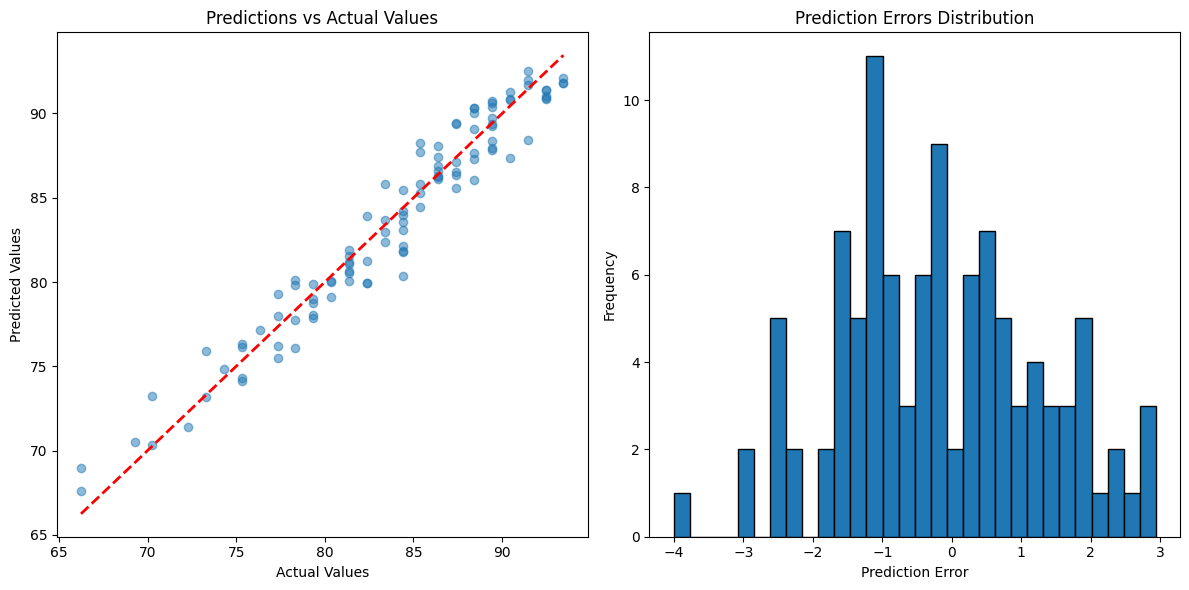

Prediction Error Metrics:
Mean Absolute Error: 1.1925
Mean Squared Error: 2.1140
Root Mean Squared Error: 1.4540


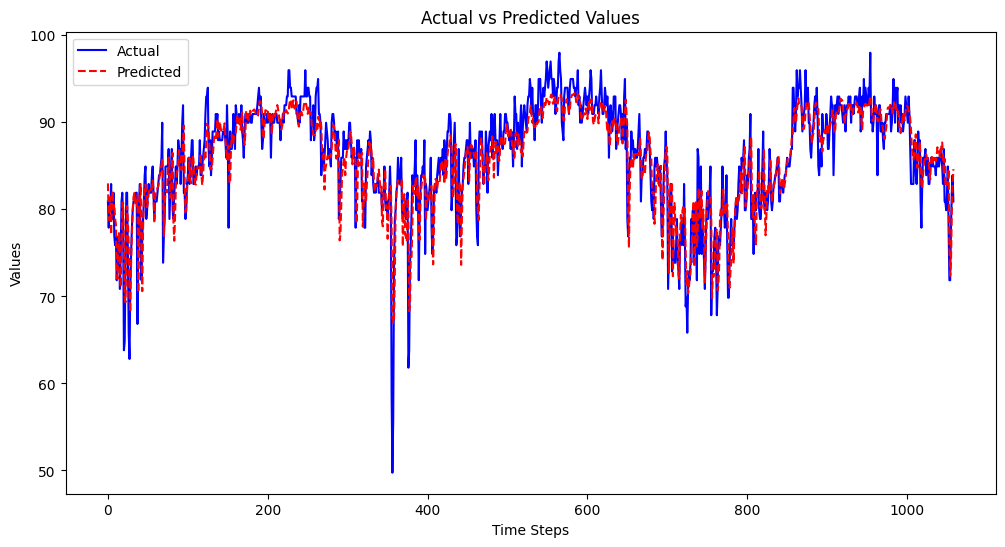

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
LSTM Test MAE: 0.1864310064095731
BiLSTM Test MAE: 0.1911524442637448
LSTM Test RMSE: 0.2273078641841987
BiLSTM Test RMSE: 0.23782367111114638
LSTM Test MSE: 0.05166886511998213
BiLSTM Test MSE: 0.05656009854078273


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_reg

In [415]:
lstm_y_pred = trained_lstm_model.predict(X_test_windowed)

# # Inverse transform predictions and actual values
lstm_y_pred_original = y_scaler.inverse_transform(lstm_y_pred)
lstm_y_test_original = y_scaler.inverse_transform(y_test_windowed)

# Plot predictions vs actual
plt.figure(figsize=(12, 6))

# # Scatter plot of predictions vs actual
plt.subplot(1, 2, 1)
plt.scatter(lstm_y_test_original, lstm_y_pred_original, alpha=0.5)
plt.plot([lstm_y_test_original.min(), lstm_y_test_original.max()], 
         [lstm_y_test_original.min(), lstm_y_test_original.max()], 
         'r--', lw=2)
plt.title('Predictions vs Actual Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

# # Prediction errors histogram
errors = lstm_y_pred_original - lstm_y_test_original
plt.subplot(1, 2, 2)
plt.hist(errors, bins=30, edgecolor='black')
plt.title('Prediction Errors Distribution')
plt.xlabel('Prediction Error')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Calculate error metrics
mae = np.mean(np.abs(errors))
mse = np.mean(errors**2)
rmse = np.sqrt(mse)

print("Prediction Error Metrics:")
print(f"Mean Absolute Error: {mae:.4f}")
print(f"Mean Squared Error: {mse:.4f}")
print(f"Root Mean Squared Error: {rmse:.4f}")


# y_test_original = pd.Series(y_test_original, index=y_lstm_test.index) 
# y_pred_original = pd.Series(y_pred_original, index=y_lstm_test.index) 
plt.figure(figsize=(12, 6))
plt.plot( y_test_original, label='Actual', color='blue')
plt.plot(y_pred_original, label='Predicted', color='red', linestyle='--')
plt.title('Actual vs Predicted Values')
plt.xlabel('Time Steps')
plt.ylabel('Values')
plt.legend()
plt.show()



y_pred_lstm = trained_lstm_model.predict(X_test_windowed)
y_pred_bilstm = ensembtrained_bilstm_model.predict(X_test_windowed)

print("LSTM Test MAE:", mean_absolute_error(y_test_windowed, y_pred_lstm))
print("BiLSTM Test MAE:", mean_absolute_error(y_test_windowed, y_pred_bilstm))
print("LSTM Test RMSE:", mean_squared_error(y_test_windowed, y_pred_lstm, squared=False))
print("BiLSTM Test RMSE:", mean_squared_error(y_test_windowed, y_pred_bilstm, squared=False))
print("LSTM Test MSE:", mean_squared_error(y_test_windowed, y_pred_lstm, squared=True))
print("BiLSTM Test MSE:", mean_squared_error(y_test_windowed, y_pred_bilstm, squared=True))


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 102ms/step


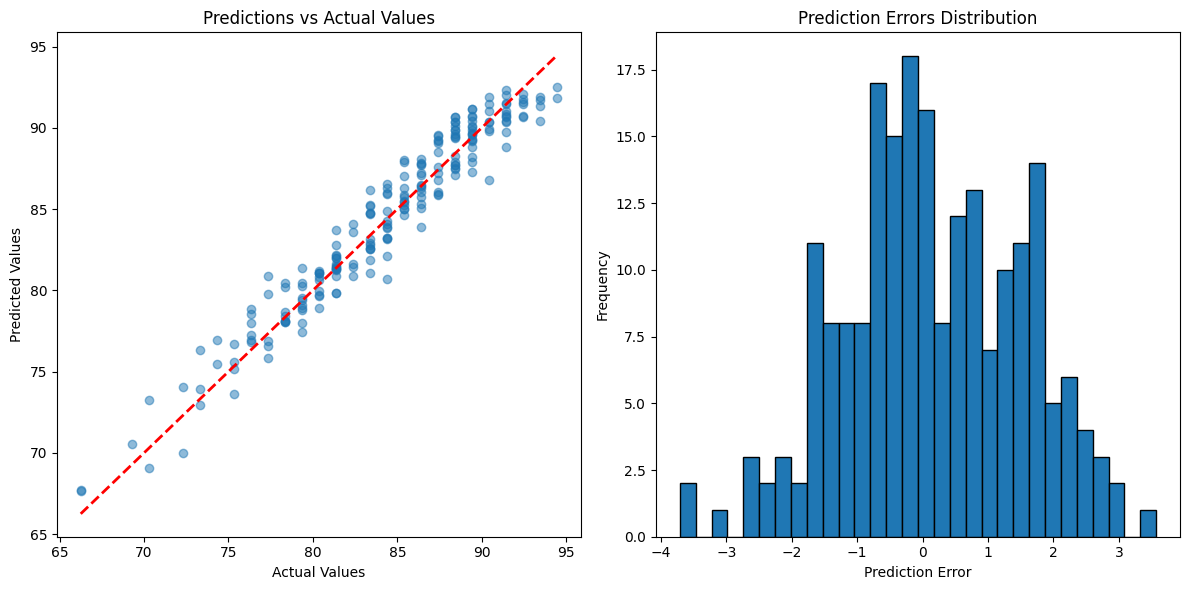

Prediction Error Metrics:
Mean Absolute Error: 1.1017
Mean Squared Error: 1.8579
Root Mean Squared Error: 1.3630


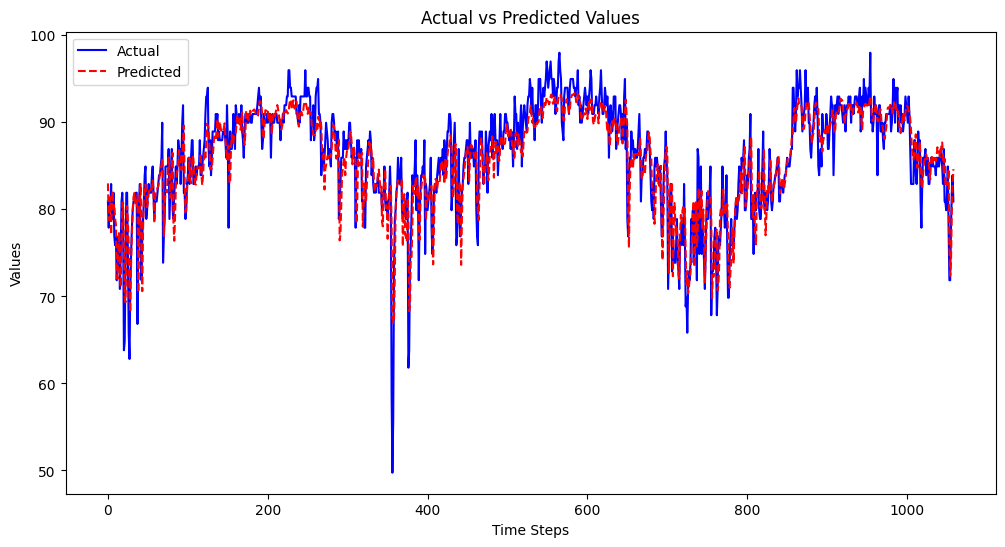

In [411]:
bilstm_y_pred = trained_bilstm_model.predict(X_test_windowed)

# # Inverse transform predictions and actual values
bilstm_y_pred_original = y_scaler.inverse_transform(bilstm_y_pred)
bilstm_y_test_original = y_scaler.inverse_transform(y_test_windowed)

# Plot predictions vs actual
plt.figure(figsize=(12, 6))

# # Scatter plot of predictions vs actual
plt.subplot(1, 2, 1)
plt.scatter(bilstm_y_test_original, bilstm_y_pred_original, alpha=0.5)
plt.plot([bilstm_y_test_original.min(), bilstm_y_test_original.max()], 
         [bilstm_y_test_original.min(), bilstm_y_test_original.max()], 
         'r--', lw=2)
plt.title('Predictions vs Actual Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

# # Prediction errors histogram
errors = bilstm_y_pred_original - bilstm_y_test_original
plt.subplot(1, 2, 2)
plt.hist(errors, bins=30, edgecolor='black')
plt.title('Prediction Errors Distribution')
plt.xlabel('Prediction Error')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Calculate error metrics
mae = np.mean(np.abs(errors))
mse = np.mean(errors**2)
rmse = np.sqrt(mse)

print("Prediction Error Metrics:")
print(f"Mean Absolute Error: {mae:.4f}")
print(f"Mean Squared Error: {mse:.4f}")
print(f"Root Mean Squared Error: {rmse:.4f}")


# y_test_original = pd.Series(y_test_original, index=y_lstm_test.index) 
# y_pred_original = pd.Series(y_pred_original, index=y_lstm_test.index) 
plt.figure(figsize=(12, 6))
plt.plot( y_test_original, label='Actual', color='blue')
plt.plot(y_pred_original, label='Predicted', color='red', linestyle='--')
plt.title('Actual vs Predicted Values')
plt.xlabel('Time Steps')
plt.ylabel('Values')
plt.legend()
plt.show()

# 1061

In [436]:
print(hp.calculate_metrics(prediction_merge['actual_max_temp'], prediction_merge['open_meteo_forecast'], .8))





(2.1660849056603753, 1.4717625167330413, 1.1872641509433954)


In [420]:
prediction_merge.columns

Index(['open_meteo_forecast', 'actual_max_temp', 'lstm_predictions',
       'bilstm_predictions', 'rf_predictions'],
      dtype='object')